In [1]:
!pip install xgboost
!pip install lightgbm

## Import Libraries

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

## import Data Set

In [5]:
#load the dataset
df = pd.read_csv(r"D:\Git Hub\SI-GuidedProject-603567-1697618783\Project Development Phase\Regression\Dataset\train.csv")

In [6]:
#displaying the first five rows
df.head()

Id        Date   Time  CO2_(dinning-room)  CO2_room  \
0   0  13/03/2012  11:45             216.560   221.920   
1   1  13/03/2012  12:00             219.947   220.363   
2   2  13/03/2012  12:15             219.403   218.933   
3   3  13/03/2012  12:30             218.613   217.045   
4   4  13/03/2012  12:45             217.714   216.080   

   Relative_humidity_(dinning-room)  Relative_humidity_room  \
0                           39.9125                 42.4150   
1                           39.9267                 42.2453   
2                           39.7720                 42.2267   
3                           39.7760                 42.0987   
4                           39.7757                 42.0686   

   Lighting_(dinning-room)  Lighting_room  Meteo_Rain  Meteo_Sun_dusk  \
0                  81.6650        113.520         0.0         623.360   
1                  81.7413        113.605         0.0         623.211   
2                  81.4240        113.600         0.0         622.656   
3                  81.5013        113.344         0.0         622.571   
4                  81.4657        113.034         0.0         622.400   

   Meteo_Wind  Meteo_Sun_light_in_west_facade  Meteo_Sun_light_in_east_facade  \
0     1.42625                         9690.24                        12604.20   
1     1.59200                        11022.00                        10787.20   
2     1.89133                        13960.50                         9669.63   
3     1.82800                        18511.20                         9648.13   
4     2.36071                        26349.00                         9208.32   

   Meteo_Sun_light_in_south_facade  Meteo_Sun_irradiance  \
0                          95436.8               758.880   
1                          95436.8               762.069   
2                          95398.6               766.251   
3                          95360.3               766.037   
4                          95354.9               762.743   

   Outdoor_relative_humidity_Sensor  Day_of_the_week  Indoor_temperature_room  
0                           48.3750              2.0                  17.8275  
1                           47.8080              2.0                  18.1207  
2                           47.4320              2.0                  18.4367  
3                           47.0240              2.0                  18.7513  
4                           45.4743              2.0                  19.0414

## Data Visualisation

<Axes: xlabel='Indoor_temperature_room', ylabel='Count'>

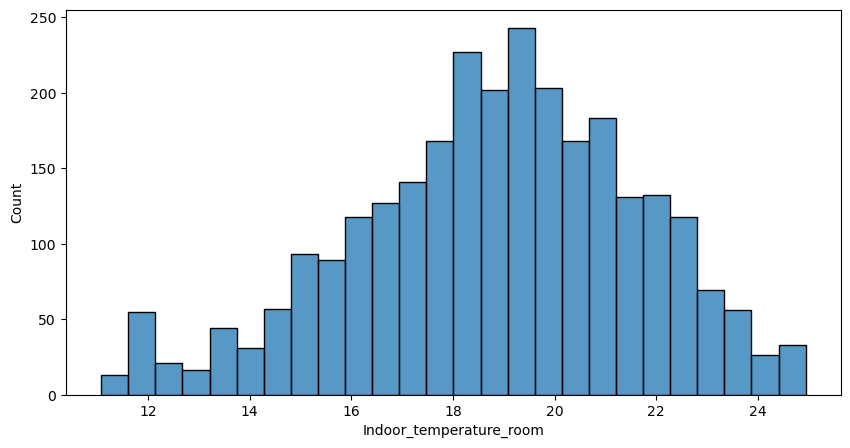

In [7]:
#univariate analysis
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Indoor_temperature_room',)

Above graph shows that the Indoor_temperature_room feature shows normal distribution

<Axes: xlabel='Relative_humidity_room', ylabel='Relative_humidity_(dinning-room)'>

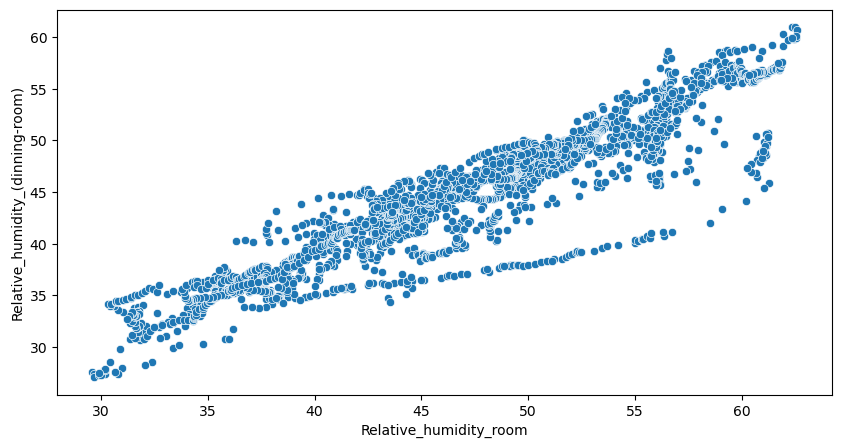

In [9]:
#Bivariate analysis
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Relative_humidity_room', y='Relative_humidity_(dinning-room)')

Independent variable = Relative_humidity_room

dependent variable = Relative_humidity_(dinning-room)

above graph represents good linear relation between above two varables

<Axes: xlabel='CO2_room', ylabel='Relative_humidity_(dinning-room)'>

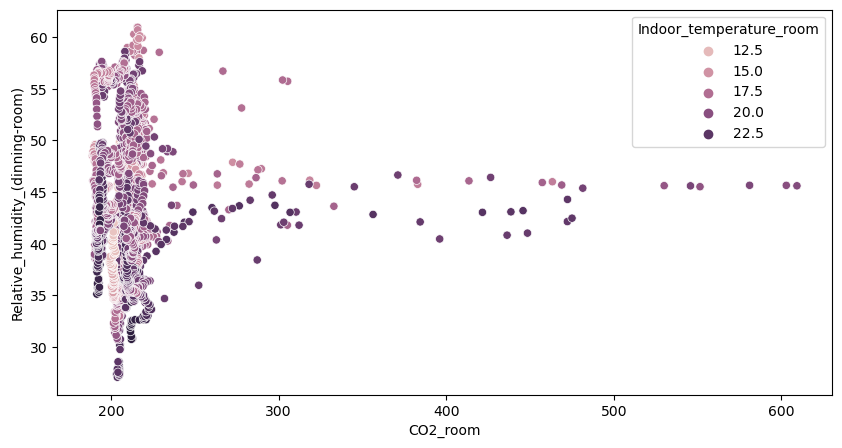

In [11]:
#multivariate analysis
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='CO2_room', y='Relative_humidity_(dinning-room)', hue='Indoor_temperature_room')

According to above graph as CO2 increase in the room, indoor temperature also increases, room_temperature is low when co2 is arround 200 and humidity is between 30-43 

In [13]:
#Descriptive Analysis
df.describe()

Id  CO2_(dinning-room)     CO2_room  \
count  2764.000000         2764.000000  2764.000000   
mean   1381.500000          208.479123   211.065844   
std     798.042397           27.032686    28.469144   
min       0.000000          187.339000   188.907000   
25%     690.750000          200.893250   202.682750   
50%    1381.500000          207.045500   209.408000   
75%    2072.250000          211.245500   213.218750   
max    2763.000000          594.389000   609.237000   

       Relative_humidity_(dinning-room)  Relative_humidity_room  \
count                       2764.000000             2764.000000   
mean                          44.878420               47.321220   
std                            6.587440                7.557795   
min                           27.084000               29.594700   
25%                           40.351975               42.531325   
50%                           45.434650               47.534700   
75%                           49.352675               52.685975   
max                           60.957300               62.594700   

       Lighting_(dinning-room)  Lighting_room   Meteo_Rain  Meteo_Sun_dusk  \
count              2764.000000    2764.000000  2764.000000     2764.000000   
mean                 26.745381      40.732571     0.047033      325.369289   
std                  23.298441      42.326087     0.206705      305.062614   
min                  10.740000      11.328000     0.000000        0.606667   
25%                  11.588700      13.265300     0.000000        0.650000   
50%                  11.801300      17.690000     0.000000      611.797000   
75%                  31.224000      52.057350     0.000000      619.210750   
max                 110.693000     162.965000     1.000000      624.960000   

        Meteo_Wind  Meteo_Sun_light_in_west_facade  \
count  2764.000000                     2764.000000   
mean      1.108531                    14936.617682   
std       1.161283                    25964.049455   
min       0.000000                        0.000000   
25%       0.094833                        0.000000   
50%       0.659000                        0.000000   
75%       1.971497                    15088.000000   
max       6.321330                    95278.400000   

       Meteo_Sun_light_in_east_facade  Meteo_Sun_light_in_south_facade  \
count                     2764.000000                      2764.000000   
mean                     12248.000148                     22047.525813   
std                      21758.550527                     32709.387051   
min                          0.000000                         0.000000   
25%                          0.000000                         0.000000   
50%                          0.000000                         0.000000   
75%                      11131.275000                     38736.575000   
max                      85535.400000                     95704.400000   

       Meteo_Sun_irradiance  Outdoor_relative_humidity_Sensor  \
count           2764.000000                       2764.000000   
mean             215.010017                         55.981988   
std              297.234046                         13.019610   
min               -4.164670                         22.260700   
25%               -3.381330                         46.430675   
50%                3.922000                         57.477350   
75%              435.434500                         65.649325   
max             1028.270000                         83.805300   

       Day_of_the_week  Indoor_temperature_room  
count      2764.000000              2764.000000  
mean          3.954438                18.824852  
std           1.991799                 2.821178  
min           1.000000                11.076000  
25%           2.000000                17.060350  
50%           4.000000                19.021000  
75%           6.000000                20.828700  
max           7.000000                24.944000

above we get total_count as count, mean, standard deviation, quantriles bu using describe function

In [15]:
#correlation between columns
corr = df.corr()
corr

C:\Users\ajayp\AppData\Local\Temp\ipykernel_21352\2195921255.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Id  CO2_(dinning-room)  CO2_room  \
Id                                1.000000           -0.226771 -0.242380   
CO2_(dinning-room)               -0.226771            1.000000  0.925522   
CO2_room                         -0.242380            0.925522  1.000000   
Relative_humidity_(dinning-room)  0.207623           -0.004698 -0.013242   
Relative_humidity_room            0.177251           -0.027170 -0.022244   
Lighting_(dinning-room)          -0.064395            0.255059  0.241727   
Lighting_room                    -0.014088            0.214517  0.196714   
Meteo_Rain                       -0.075370           -0.078120 -0.077395   
Meteo_Sun_dusk                    0.013842            0.121910  0.108002   
Meteo_Wind                        0.027212            0.029190  0.009194   
Meteo_Sun_light_in_west_facade   -0.040328            0.146489  0.115046   
Meteo_Sun_light_in_east_facade   -0.012653            0.023633  0.012565   
Meteo_Sun_light_in_south_facade  -0.112416            0.256665  0.242475   
Meteo_Sun_irradiance              0.000025            0.226493  0.204212   
Outdoor_relative_humidity_Sensor -0.042246           -0.028235 -0.009462   
Day_of_the_week                  -0.036023           -0.135281 -0.129085   
Indoor_temperature_room           0.246559            0.061361  0.056195   

                                  Relative_humidity_(dinning-room)  \
Id                                                        0.207623   
CO2_(dinning-room)                                       -0.004698   
CO2_room                                                 -0.013242   
Relative_humidity_(dinning-room)                          1.000000   
Relative_humidity_room                                    0.931267   
Lighting_(dinning-room)                                  -0.046600   
Lighting_room                                            -0.017654   
Meteo_Rain                                               -0.081597   
Meteo_Sun_dusk                                           -0.052456   
Meteo_Wind                                               -0.197537   
Meteo_Sun_light_in_west_facade                           -0.100505   
Meteo_Sun_light_in_east_facade                           -0.016503   
Meteo_Sun_light_in_south_facade                          -0.057019   
Meteo_Sun_irradiance                                     -0.045240   
Outdoor_relative_humidity_Sensor                          0.696973   
Day_of_the_week                                          -0.058968   
Indoor_temperature_room                                  -0.275193   

                                  Relative_humidity_room  \
Id                                              0.177251   
CO2_(dinning-room)                             -0.027170   
CO2_room                                       -0.022244   
Relative_humidity_(dinning-room)                0.931267   
Relative_humidity_room                          1.000000   
Lighting_(dinning-room)                        -0.116434   
Lighting_room                                  -0.092876   
Meteo_Rain                                      0.051322   
Meteo_Sun_dusk                                 -0.083595   
Meteo_Wind                                     -0.153276   
Meteo_Sun_light_in_west_facade                 -0.130920   
Meteo_Sun_light_in_east_facade                 -0.067384   
Meteo_Sun_light_in_south_facade                -0.133493   
Meteo_Sun_irradiance                           -0.120310   
Outdoor_relative_humidity_Sensor                0.809993   
Day_of_the_week                                -0.103301   
Indoor_temperature_room                        -0.417901   

                                  Lighting_(dinning-room)  Lighting_room  \
Id                                              -0.064395      -0.014088   
CO2_(dinning-room)                               0.255059       0.214517   
CO2_room                                         0.241727       0.196714   
Relative_humidity_(dinnin

<Axes: >

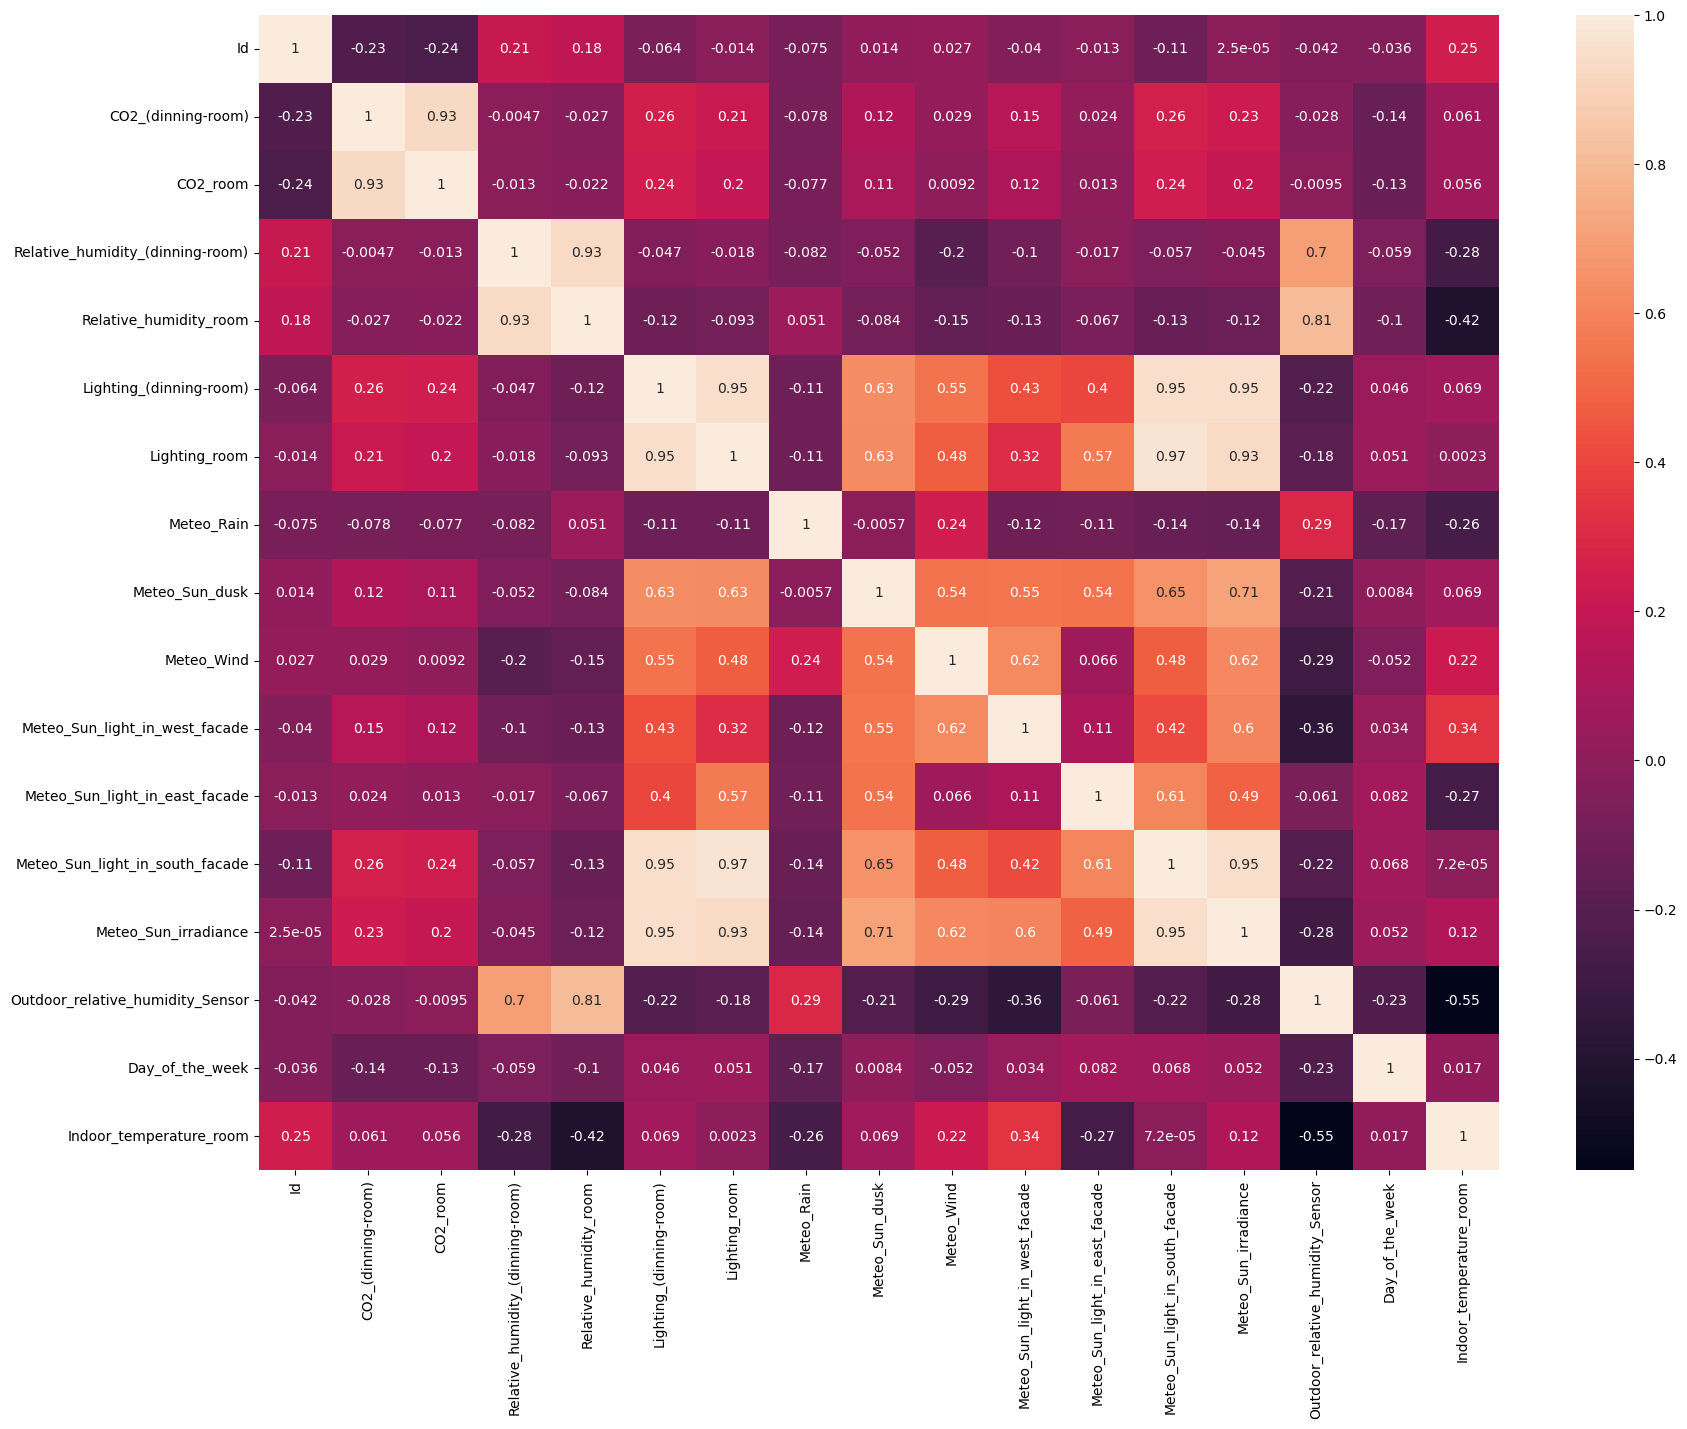

In [16]:
#plot above correlation
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True)

In above we can see that similar feature like lighting, humidity, CO2 for room and dinning room are highly correlative

and Meteo_Sun_light_in_south_facade and Meteo_Sun_irradian are also highly correlativwe with lighting for both room and dinning room

## Data Preprocessing

In [18]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                2764 non-null   int64  
 1   Date                              2764 non-null   object 
 2   Time                              2764 non-null   object 
 3   CO2_(dinning-room)                2764 non-null   float64
 4   CO2_room                          2764 non-null   float64
 5   Relative_humidity_(dinning-room)  2764 non-null   float64
 6   Relative_humidity_room            2764 non-null   float64
 7   Lighting_(dinning-room)           2764 non-null   float64
 8   Lighting_room                     2764 non-null   float64
 9   Meteo_Rain                        2764 non-null   float64
 10  Meteo_Sun_dusk                    2764 non-null   float64
 11  Meteo_Wind                        2764 non-null   float64
 12  Meteo_

In [19]:
#checking for null values
#get sum of null values
df.isnull().sum()

Id                                  0
Date                                0
Time                                0
CO2_(dinning-room)                  0
CO2_room                            0
Relative_humidity_(dinning-room)    0
Relative_humidity_room              0
Lighting_(dinning-room)             0
Lighting_room                       0
Meteo_Rain                          0
Meteo_Sun_dusk                      0
Meteo_Wind                          0
Meteo_Sun_light_in_west_facade      0
Meteo_Sun_light_in_east_facade      0
Meteo_Sun_light_in_south_facade     0
Meteo_Sun_irradiance                0
Outdoor_relative_humidity_Sensor    0
Day_of_the_week                     0
Indoor_temperature_room             0
dtype: int64

above it is seen that no null values in our data and now there is no need to handle them

In [21]:
#Handling categorical Data
#again through indormation
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                2764 non-null   int64  
 1   Date                              2764 non-null   object 
 2   Time                              2764 non-null   object 
 3   CO2_(dinning-room)                2764 non-null   float64
 4   CO2_room                          2764 non-null   float64
 5   Relative_humidity_(dinning-room)  2764 non-null   float64
 6   Relative_humidity_room            2764 non-null   float64
 7   Lighting_(dinning-room)           2764 non-null   float64
 8   Lighting_room                     2764 non-null   float64
 9   Meteo_Rain                        2764 non-null   float64
 10  Meteo_Sun_dusk                    2764 non-null   float64
 11  Meteo_Wind                        2764 non-null   float64
 12  Meteo_

from above we can see data and time is only object data type and that data we are not including in our training so we don't need to handle categorical data.
Other data types are float.

In [26]:
#Seperate depedent and independent variables
x=df.iloc[:,3:17] #INDEPENDENT VARIABLE
y=df.iloc[:,18:] #DEPENDENT VARIABLE

In [27]:
x.head()

CO2_(dinning-room)  CO2_room  Relative_humidity_(dinning-room)  \
0             216.560   221.920                           39.9125   
1             219.947   220.363                           39.9267   
2             219.403   218.933                           39.7720   
3             218.613   217.045                           39.7760   
4             217.714   216.080                           39.7757   

   Relative_humidity_room  Lighting_(dinning-room)  Lighting_room  Meteo_Rain  \
0                 42.4150                  81.6650        113.520         0.0   
1                 42.2453                  81.7413        113.605         0.0   
2                 42.2267                  81.4240        113.600         0.0   
3                 42.0987                  81.5013        113.344         0.0   
4                 42.0686                  81.4657        113.034         0.0   

   Meteo_Sun_dusk  Meteo_Wind  Meteo_Sun_light_in_west_facade  \
0         623.360     1.42625                         9690.24   
1         623.211     1.59200                        11022.00   
2         622.656     1.89133                        13960.50   
3         622.571     1.82800                        18511.20   
4         622.400     2.36071                        26349.00   

   Meteo_Sun_light_in_east_facade  Meteo_Sun_light_in_south_facade  \
0                        12604.20                          95436.8   
1                        10787.20                          95436.8   
2                         9669.63                          95398.6   
3                         9648.13                          95360.3   
4                         9208.32                          95354.9   

   Meteo_Sun_irradiance  Outdoor_relative_humidity_Sensor  
0               758.880                           48.3750  
1               762.069                           47.8080  
2               766.251                           47.4320  
3               766.037                           47.0240  
4               762.743                           45.4743

In [28]:
y.head()

Indoor_temperature_room
0                  17.8275
1                  18.1207
2                  18.4367
3                  18.7513
4                  19.0414

In [30]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [31]:
#Data Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

## Model Building

4 classification algorithms are used in model building

    Linear Regression Model
    Random Forest model
    Light Gradient Boost Model
    Xgboost model

### Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression
lir = LinearRegression()
lir.fit(x_train_scaled,y_train)

LinearRegression()

In [45]:
pred=lir.predict(x_test_scaled)

In [46]:
from sklearn.metrics import r2_score 
r2_score(pred,y_test)

0.17425288988529142

### Random Forest model

In [52]:
rf = RandomForestRegressor()

In [53]:
rf.fit(x_train,y_train)

C:\Users\ajayp\AppData\Local\Temp\ipykernel_21352\1149647727.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor()

In [54]:
pred1 = rf.predict(x_test)

In [57]:
pred1

array([21.709279, 21.331607, 18.847778, 15.543171, 15.163657, 18.599724,
       17.699708, 16.372337, 18.506038, 18.244855, 22.251611, 16.553226,
       22.740473, 21.598166, 18.102771, 19.808512, 20.165763, 17.949757,
       21.639011, 16.404427, 19.659224, 15.98586 , 16.657549, 20.477172,
       19.033872, 18.981002, 23.316474, 22.618729, 12.357007, 22.163244,
       17.936657, 20.105202, 20.192062, 21.108115, 18.132439, 15.718249,
       17.887554, 16.360638, 14.759967, 21.714498, 20.955733, 21.022751,
       22.504452, 15.79035 , 16.119626, 16.290792, 17.692979, 19.809642,
       20.157668, 22.77067 , 18.752159, 21.828437, 19.470653, 18.945398,
       22.10933 , 22.704784, 17.487206, 17.694937, 22.050094, 17.078754,
       22.814239, 19.588855, 19.479554, 19.721363, 22.394252, 17.112379,
       18.477842, 20.977521, 19.801573, 21.19617 , 19.530373, 17.987032,
       17.533394, 22.261696, 21.714559, 16.216734, 20.117604, 22.703442,
       19.537139, 16.671095, 24.22148 , 18.624195, 

In [58]:
r2_score(y_test, pred1)

0.916904424778283

### Light Gradient Boost Model

In [77]:
lg = lgb.LGBMRegressor()

In [78]:
lg.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3303
[LightGBM] [Info] Number of data points in the train set: 1934, number of used features: 14
[LightGBM] [Info] Start training from score 18.826209


LGBMRegressor()

In [79]:
pred2 = lg.predict(x_test)

In [80]:
r2_score(y_test, pred2)

0.9360756052934541

### Xgboost Model

In [81]:
xg = xgb.XGBRegressor()

In [82]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [83]:
pred3 = xg.predict(x_test)

In [84]:
r2_score(y_test,pred3)

0.9312711740450739

In [75]:
xg1 = xgb.XGBRegressor()
xg1.fit(x_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

    *Model*       *r2_score*
     lir           17.4%
     rf            91.7%
     lg            93.6%
     xg            93.1%
     
Here above lg is the best model, hence we will export the model


In [85]:
import pickle
pickle.dump(lg,open('temperature.pkl','wb'))